# Esercitazione 9

**30 Aprile 2024**

*Gradiente e gradiente coniugato*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as spl

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))
import Schel_FULL as sf

## Esercizio 1-Bis
Implementare la funzione **steepestdescent_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k.

N.B: f(x) è il funzionale quadratico da minimizzare (f(x)= <Ax,x>-<b,x>) ,
X,Y sono la discretizzazione del piano su cui costruire Z (ottenuta valutando f sui punti della griglia)

In [3]:
def f(x,A,b):
    Ax = A@x
    xAx = x.T@Ax
    bx = b.T@x
    return 0.5 * xAx - bx


In [4]:
def steepestdescentCL(A,b,x0,itmax,X, Y, Z,f, tol):
 
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    if n != 2 :
       print("La matrice non ha due dimensioni")
       return [], []
    
    
   # inizializzare le variabili necessarie
    x = x0

    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'r-o')
    r = A@x-b  # residuo
    p = -r     # opposto del residuo
    it = 0
  
    errore=np.linalg.norm(r)/np.linalg.norm(b)
    vec_sol=[]
    vec_sol.append(x)
    vet_r=[]
    vet_r.append(errore)
     
# utilizzare il metodo del gradiente per trovare la soluzione
    while errore>= tol and it< itmax:
        it=it+1
        Ap=A@p
       
        alpha = (r.T@r)/(p.T@Ap)

        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
                
        x = x + alpha*p  #aggiornamento della soluzione nella direzione opposta a quella del gradiente: alpha mi dice dove fermarmi 
        #nella direzione del gradiente affinche F(xk+t p ) <F(xk)
        
         
        vec_sol.append(x)
        r=r+alpha*Ap
        errore=np.linalg.norm(r)/np.linalg.norm(b)
        vet_r.append(errore)
        p = -r #Direzione opposta alla direzione del gradiente
        
     
    return x,vet_r,vec_sol,it

## Esercizio 2-Bis
Implementare la funzione **conjugate_gradient_CL(A,b,x0,itmax,X,Y,Z,f,tol)** da utilizzare solo nel caso n=2 che visualizza anche le curve di livello e l'iterato x_k

In [5]:
def conjugate_gradientCL(A,b,x0,itmax,X,Y,Z,f,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    
    r = A@x-b

    plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
    plt.plot(x[0],x[1],'ro')
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(Ap.T@p)
        
        x = x + alpha *p
        plt.contour(X, Y, Z, levels=f(x,A,b).flatten())
        plt.plot(x[0],x[1],'ro')
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma=r.T@r/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p  #La nuova direzione appartiene al piano individuato da -r e p. gamma è scelto in maniera tale che la nuova direzione
        #sia coniugata rispetto alla direzione precedente( che geometricamente significa che punti verso il centro)
   
    
    return x,vet_r,vec_sol,it

## Test didattici per il caso n=2, visualizzando le curve di livello

Risolvere il sistema lineare Ax=b, dove A=np.array([[8,4],[4,3]]) e b=np.array([8,10]), utilizzando
il metodo del gradiente e del gradiente coniugato con la visualizzazione grafica delle curve di livello e della soluzione ad ogni iterazione. Si selezioni l'iterato iniziale x0=[0,0], itmax=200
tol=1e-10. Si confrontino le iterazioni effettuate da ciascuno dei due metodi e si visualizzi l'errore ad ogni iterazione.

/tmp/ipykernel_5974/3455352704.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)


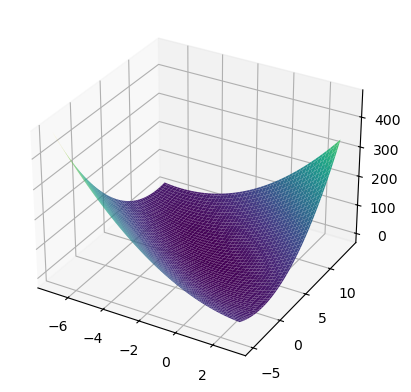

In [6]:
A=np.array([[8,4],[4,3]])
b=np.array([8,10])
x0=np.zeros_like(b)
itmax=200
tol = 1e-10

x=np.linspace(-7,3,100)
y=np.linspace(-5,14,100)
 
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(len(y)):
    for j in range(len(x)):
        x_coor = X[i][j]
        y_coor = Y[i][j]
        Z[i][j] = f(np.array([[x_coor], [y_coor]]),A,b)

 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotta la superficie
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)

# Mostra il grafico
plt.show() 



Soluzione steepest =  [-2.  6.]
Iterazioni steepest =  83


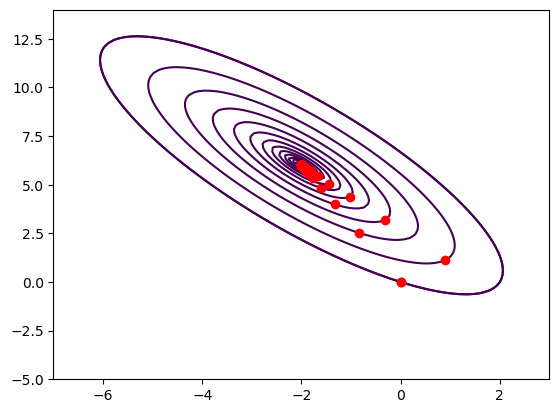

In [7]:
x_steep,res_vec_steep,sol_vec_steep,num_it_steep = steepestdescentCL(A,b,x0,itmax, X,Y,Z,f,tol)
print("Soluzione steepest = ", x_steep)
print("Iterazioni steepest = ", num_it_steep)

Soluzione conjugate =  [-2.  6.]
Iterazioni conjugate =  2


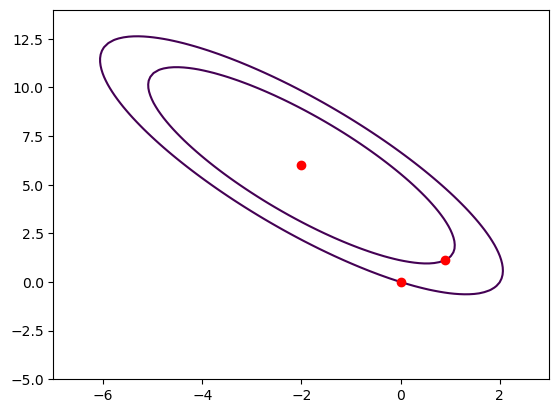

In [8]:
x_conj,res_vec_conj,sol_vec_conj,num_it_conj = conjugate_gradientCL(A,b,x0,itmax, X,Y,Z,f,tol)
print("Soluzione conjugate = ", x_conj)
print("Iterazioni conjugate = ", num_it_conj)

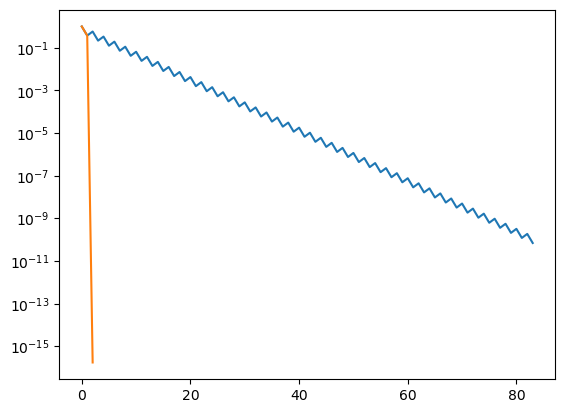

In [9]:
plt.semilogy(np.arange(num_it_steep+1), res_vec_steep,np.arange(num_it_conj+1),res_vec_conj)

## Esercizio 3
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$

- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson con ordine che va da 10 a 100 con step 2,  e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo del gradiente e del gradiente coniugato  

In [10]:
def creaPoisson(n):
    mainDiag = np.diag(4*np.ones(n), 0)
    secondDiagDown = np.diag(-np.ones(n-1), -1)
    secondDiagUp = np.diag(-np.ones(n-1), 1)
    thirdDiagDown = np.diag(-np.ones(n-3), -3)
    thirdDiagUp = np.diag(-np.ones(n-3), 3)
    return np.zeros((n,n))+ mainDiag + secondDiagDown + secondDiagUp + thirdDiagDown + thirdDiagUp

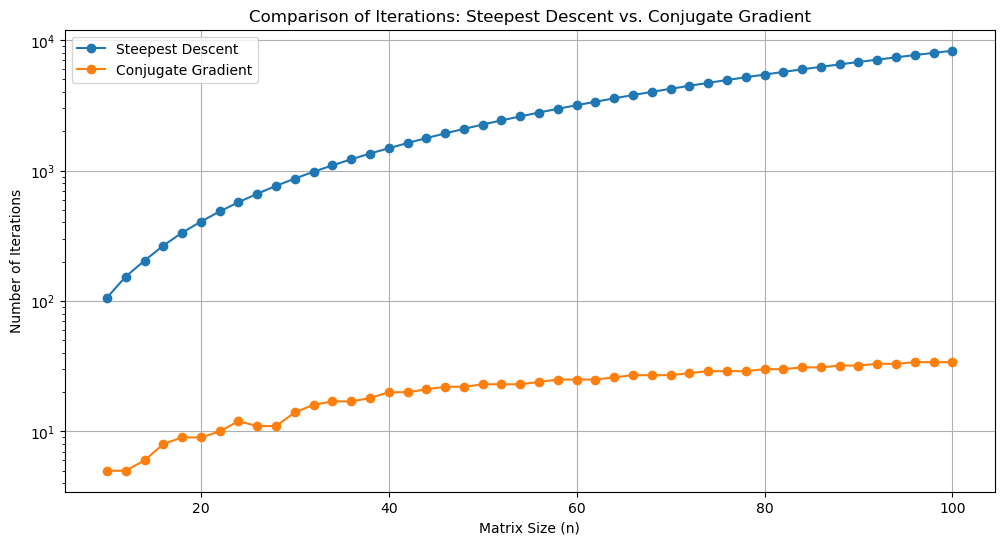

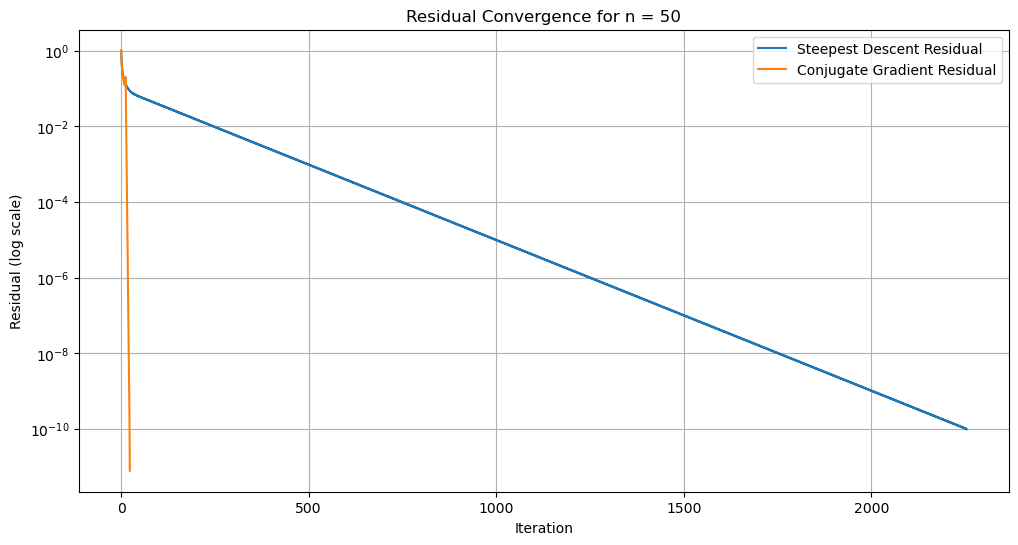

In [11]:
indCond = []
steepest_iterations = []
conjugate_iterations = []
n_values = range(10,101, 2)

for n in n_values:
    P = creaPoisson(n)
    b = np.sum(P,1).reshape(n,1)
    x0 = np.zeros_like(b)
    itmax = 10000
    x_steep,res_vec_steep,sol_vec_steep,num_it_steep = sf.steepestdescent(P,b,x0,itmax,tol)
    steepest_iterations.append(num_it_steep)

    x_conj,res_vec_conj,sol_vec_conj,num_it_conj = sf.conjugate_gradient(P,b,x0,itmax,tol)
    conjugate_iterations.append(num_it_conj)



# Step 3: Plotting the results

plt.figure(figsize=(12, 6))

# Plot the number of iterations required for each method
plt.semilogy(n_values, steepest_iterations, label='Steepest Descent', marker='o')
plt.semilogy(n_values, conjugate_iterations, label='Conjugate Gradient', marker='o')

plt.xlabel('Matrix Size (n)')
plt.ylabel('Number of Iterations')
plt.title('Comparison of Iterations: Steepest Descent vs. Conjugate Gradient')
plt.legend()
plt.grid(True)

plt.show()

# Plot residuals for a specific matrix size (e.g., n=50)
n = 50
P = creaPoisson(n)
b = np.sum(P, axis=1).reshape(n, 1)
x0 = np.zeros_like(b)
itmax = 10000

x_steep, res_vec_steep, sol_vec_steep, num_it_steep = sf.steepestdescent(P, b, x0, itmax, tol)
x_conj, res_vec_conj, sol_vec_conj, num_it_conj = sf.conjugate_gradient(P, b, x0, itmax, tol)

plt.figure(figsize=(12, 6))

# Residual plots
plt.semilogy(range(len(res_vec_steep)), res_vec_steep, label='Steepest Descent Residual')
plt.semilogy(range(len(res_vec_conj)), res_vec_conj, label='Conjugate Gradient Residual')

plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Residual Convergence for n = 50')
plt.legend()
plt.grid(True)

plt.show()


## Esercizio 4
Consideriamo il sistema lineare Ax=b  dov A è  la matrice di Hilbert di dimensione 5, costruita usando la funzione hilbert(n) di scipy.linalg (A=scipy.linalg.hilbert(5)) in modo tale che la soluzione esatta sia $x = (1, 1, . . . , 1)^T$ .
Risolvere il sistema lineare usando sia il metodi del gradiente che il metodo del gradiente coniugato e confrontarne gli errori ad ogni iterazione.

Numero di iterazioni del gradiente steepest  10000
Numero di iterazioni del gradiente coniugato  7
Condizionamento di Hilbert  476607.25024100044


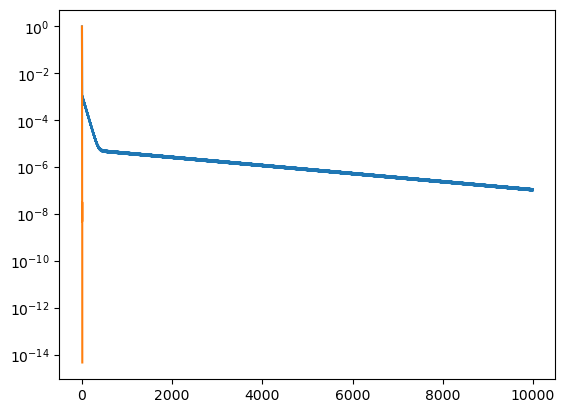

In [18]:
H = spl.hilbert(5)
b = np.sum(H, 1)
tol = 1e-10
x0 = np.zeros_like(b)
itmax = 10000

x_steep, res_vec_steep, sol_vec_steep, num_it_steep = sf.steepestdescent(H, b, x0, itmax, tol)
x_conj, res_vec_conj, sol_vec_conj, num_it_conj = sf.conjugate_gradient(H, b, x0, itmax, tol)

print("Numero di iterazioni del gradiente steepest ", num_it_steep)
print("Numero di iterazioni del gradiente coniugato ", num_it_conj)
print("Condizionamento di Hilbert ",np.linalg.cond(H))

plt.semilogy(np.arange(num_it_steep+1),res_vec_steep,np.arange(num_it_conj+1),res_vec_conj)

## Esercizio 5
Importare il file creaG ed utilizzare le funzioni sottospecificate per creare, scelto $n$,  una matrice D di ordine $m=(n-2)^2$

*import creaG*

*G = creaG.numgrid(n)*

*D = creaG.delsq(G).todense().getA()*

Risolvere il sistema lineare Dx=b, con matrice G di ordine m=16 ed ordine m=400, (scegliere n in maniera opportuna), usando i metodi del gradiente e del gradiente coniugato. Confrontare gli errori su uno stesso grafico e giustifcare i risultati alla luce del risultato teorico della maggiorazione dell'errore per entrambi i metodi

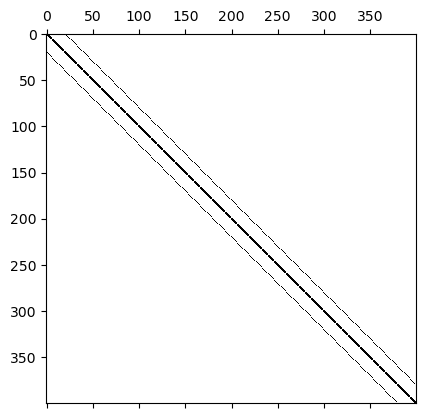

In [13]:
import creaG
n=22  #n=6-->m=16;  n=22-->m=400
G = creaG.numgrid(n)
D = creaG.delsq(G).todense().getA()
plt.spy(D)  #Visualizza la matrice: in bianco i valori nulli, in nero i valori diversi da zero
condD=np.linalg.cond(D)
n=D.shape[0]
b=np.sum(D,axis=1).reshape(n,1)
tol = 1e-10
x0 = np.zeros_like(b)
itmax = 10000

x_steep, res_vec_steep, sol_vec_steep, num_it_steep = sf.steepestdescent(D, b, x0, itmax, tol)
x_conj, res_vec_conj, sol_vec_conj, num_it_conj = sf.conjugate_gradient(D, b, x0, itmax, tol)

In [14]:
print("Numero di iterazioni del gradiente  ", num_it_steep)
print("Numero di iterazioni del gradiente coniugato ", num_it_conj)

Numero di iterazioni del gradiente   1824
Numero di iterazioni del gradiente coniugato  41


Dalla teoria sappiamo che nel metodo del gradiente

$$
\| e_k \|_A \leq \frac{K(A) - 1}{K(A) + 1} \| e_0 \|_A
$$

quindi l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo: maggiore è l'indice di condizionamento, più il fattore di riduzione dell'errore si avvicina a 1.

Valutiamo quindi l'espressione:

$$
\frac{K(A) - 1}{K(A) + 1}
$$

nel nostro caso.


In [15]:
print((np.linalg.cond(D)-1)/(np.linalg.cond(D)+1))

0.9888308262251286


Dalla teoria sappiamo che nel metodo del gradiente coniugato

$$
\| e_k \|_A \leq \frac{\sqrt{K(A)} - 1}{\sqrt{K(A)} + 1} \| e_0 \|_A
$$

quindi l'indice di condizionamento della matrice influenza la velocità di convergenza del metodo, ma meno gravemente rispetto al metodo del gradiente: maggiore è l'indice di condizionamento, più il fattore di riduzione dell'errore si avvicina a 1.

L'espressione per il fattore di riduzione dell'errore è:

$$
\frac{\sqrt{K(A)} - 1}{\sqrt{K(A)} + 1}
$$

Valutiamo quindi questa espressione nel nostro caso.


In [16]:
print((np.sqrt(np.linalg.cond(D))-1)/(np.sqrt(np.linalg.cond(D))+1))

0.8605695850647834


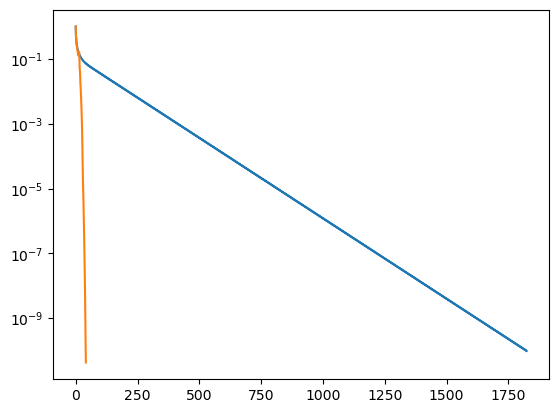

In [17]:
plt.semilogy(np.arange(num_it_steep+1),res_vec_steep,np.arange(num_it_conj+1),res_vec_conj)